# Importing Libraries

In [1]:
import pandas as pd
import os
import numpy as np
import glob
from dateutil.parser import parse
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
import xgboost as xgb

# Reading the dataset

In [2]:
data = pd.read_csv("combined_df.csv")
pd.options.display.max_columns = None
display(data)

/var/folders/nl/16kxd0d150jfyzdm5tzlw6mr0000gn/T/ipykernel_40578/1318799547.py:1: DtypeWarning: Columns (2,7,11,12,14,23,25,26,35,36,37,40,41,51,52,55,56,57,59,68,69,73,77,80) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("combined_df.csv")


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Commander,Voice Command
0,52.95.122.231-192.168.4.18-443-49866-6,52.95.122.231,443,192.168.4.18,49866.0,6.0,29/03/2021 05:08:58 a.m.,18083070,262.0,197.0,104207.0,28716.0,1460.0,0.0,397.736641,515.754467,1460.0,0.0,145.766497,239.837799,7350.687687,25.382858,39482.685590,623576.759894,13333308.0,18.0,18073053.0,69245.413793,8.290401e+05,13384285.0,18.0,18081658.0,92253.357143,952748.037901,13333308.0,21.0,1,0,0.0,0.0,5240,3940,14.488690,10.894168,0.0,1460.0,289.063043,437.609637,191502.194274,0.0,0.0,0,249,459.0,0.0,0,0,0.0,289.692810,397.736641,145.766497,0.0,0.0,0.0,0.0,132.0,28063.0,0.0,227,0,62.0,3076.0,11729.0,133,20.0,0.0,0.0,0,0.0,1.617005e+15,2523075.510598,1.617005e+15,1.617005e+15,No Label,Salli,why_do_you_have_a_yellow_light?
1,192.168.4.18-52.95.122.231-49866-443-6,192.168.4.18,49866,52.95.122.231,443.0,6.0,29/03/2021 05:36:32 a.m.,17120563,171.0,205.0,28438.0,103971.0,1460.0,0.0,166.304094,249.679232,1460.0,0.0,507.175610,672.937115,7733.916227,21.961895,45654.834667,712317.673352,13798791.0,18.0,17120563.0,100709.194118,1.057207e+06,13798791.0,52.0,17071875.0,83685.661765,972639.142123,13900468.0,35.0,1,0,0.0,0.0,3420,4100,9.987989,11.973905,0.0,1460.0,352.005305,550.178661,302696.558482,0.0,0.0,0,142,376.0,0.0,0,0,1.0,352.941489,166.304094,507.175610,0.0,0.0,0.0,0.0,105.0,40279.0,0.0,75,0,276.0,11729.0,3076.0,125,20.0,0.0,0.0,0,0.0,1.617007e+15,2065807.695396,1.617007e+15,1.617007e+15,No Label,Salli,why_do_you_have_a_yellow_light?
2,192.168.4.18-3.227.149.192-33052-443-6,192.168.4.18,33052,3.227.149.192,443.0,6.0,29/03/2021 05:36:49 a.m.,94241,2.0,1.0,33.0,31.0,33.0,0.0,16.5,23.334524,31.0,31.0,31.000000,0.000000,679.109942,31.833279,47120.500000,64146.605869,92479.0,1762.0,94241.0,94241.000000,0.000000e+00,94241.0,94241.0,0.0,0.000000,0.000000,0.0,0.0,1,0,0.0,0.0,64,32,21.222186,10.611093,0.0,33.0,24.250000,16.194135,262.250000,0.0,0.0,0,2,3.0,0.0,0,0,0.0,32.333333,16.5,31.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,0,10.0,1456.0,122.0,0,32.0,0.0,0.0,0,0.0,1.617007e+15,0.0,1.617007e+15,1.617007e+15,No Label,Salli,why_do_you_have_a_yellow_light?
3,192.168.4.18-52.95.115.208-45376-443-6,192.168.4.18,45376,52.95.115.208,443.0,6.0,29/03/2021 02:54:05 a.m.,17213482,208.0,215.0,28938.0,104439.0,1460.0,0.0,139.125,232.466597,1460.0,0.0,485.762791,512.176293,7748.403257,24.573761,40790.241706,547540.711648,11034704.0,7.0,17213482.0,83156.917874,7.868540e+05,11124611.0,7.0,17159884.0,80186.373832,771138.054913,11081013.0,36.0,1,0,0.0,0.0,4160,4300,12.083552,12.490210,0.0,1460.0,315.264151,434.960117,189190.303582,0.0,0.0,0,266,423.0,0.0,0,0,1.0,316.009456,139.125,485.762791,0.0,0.0,0.0,0.0,136.0,34422.0,0.0,68,0,246.0,14644.0,5600.0,129,20.0,0.0,0.0,0,0.0,1.616997e+15,2138538.393376,1.616997e+15,1.616997e+15,No Label,Salli,why_do_you_have_a_yellow_light?
4,192.168.4.18-3.227.149.192-33052-443-6,192.168.4.18,33052,3.227.149.192,44

# Dataset Info

In [3]:
dataset = data.convert_dtypes()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380194 entries, 0 to 380193
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            380189 non-null  string 
 1   Src IP             380194 non-null  string 
 2   Src Port           380194 non-null  object 
 3   Dst IP             380193 non-null  string 
 4   Dst Port           380192 non-null  Float64
 5   Protocol           380192 non-null  Float64
 6   Timestamp          380192 non-null  string 
 7   Flow Duration      380192 non-null  object 
 8   Tot Fwd Pkts       380191 non-null  Float64
 9   Tot Bwd Pkts       380191 non-null  Float64
 10  TotLen Fwd Pkts    380191 non-null  Float64
 11  TotLen Bwd Pkts    380191 non-null  object 
 12  Fwd Pkt Len Max    380190 non-null  object 
 13  Fwd Pkt Len Min    380188 non-null  Float64
 14  Fwd Pkt Len Mean   380188 non-null  object 
 15  Fwd Pkt Len Std    380187 non-null  Float64
 16  Bw

# Data Preprocessing

1-Validating IP formats

In [4]:

ip_pattern = r'^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$'

dataset = dataset[dataset['Dst IP'].str.match(ip_pattern)]

Filtering the dataset to keep only the rows where the 'Dst IP' column contains valid IP addresses

In [5]:
dataset['Dst IP'] = dataset['Dst IP'].fillna('')

2- Reformating Timestamp

In [6]:

dataset['Timestamp'] = dataset['Timestamp'].apply(lambda x: parse(x))

print(dataset.head())

                                  Flow ID         Src IP Src Port  \
0  52.95.122.231-192.168.4.18-443-49866-6  52.95.122.231      443   
1  192.168.4.18-52.95.122.231-49866-443-6   192.168.4.18    49866   
2  192.168.4.18-3.227.149.192-33052-443-6   192.168.4.18    33052   
3  192.168.4.18-52.95.115.208-45376-443-6   192.168.4.18    45376   
4  192.168.4.18-3.227.149.192-33052-443-6   192.168.4.18    33052   

          Dst IP  Dst Port  Protocol           Timestamp Flow Duration  \
0   192.168.4.18   49866.0       6.0 2021-03-29 05:08:58      18083070   
1  52.95.122.231     443.0       6.0 2021-03-29 05:36:32      17120563   
2  3.227.149.192     443.0       6.0 2021-03-29 05:36:49         94241   
3  52.95.115.208     443.0       6.0 2021-03-29 02:54:05      17213482   
4  3.227.149.192     443.0       6.0 2021-03-29 02:54:12         94501   

   Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts TotLen Bwd Pkts  \
0         262.0         197.0         104207.0         28716.0   
1       

Getting the duration fo the data collection process

In [7]:
min_timestamp = min(dataset['Timestamp'])
max_timestamp = max(dataset['Timestamp'])

duration = max_timestamp - min_timestamp
duration

Timedelta('334 days 23:59:41')

In [8]:
#Handling duplicate values
dataset = dataset.drop_duplicates()

In [9]:
dataset

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Commander,Voice Command
0,52.95.122.231-192.168.4.18-443-49866-6,52.95.122.231,443,192.168.4.18,49866.0,6.0,2021-03-29 05:08:58,18083070,262.0,197.0,104207.0,28716.0,1460.0,0.0,397.736641,515.754467,1460.0,0.0,145.766497,239.837799,7350.687687,25.382858,39482.68559,623576.759894,13333308.0,18.0,18073053.0,69245.413793,829040.137065,13384285.0,18.0,18081658.0,92253.357143,952748.037901,13333308.0,21.0,1,0,0.0,0.0,5240,3940,14.48869,10.894168,0.0,1460.0,289.063043,437.609637,191502.194274,0.0,0.0,0,249,459.0,0.0,0,0,0.0,289.69281,397.736641,145.766497,0,0,0,0,132,28063.0,0,227,0,62.0,3076,11729,133,20,0,0,0,0,1617005341918823.5,2523075.510598,1617005356990842,1617005338908084,No Label,Salli,why_do_you_have_a_yellow_light?
1,192.168.4.18-52.95.122.231-49866-443-6,192.168.4.18,49866,52.95.122.231,443.0,6.0,2021-03-29 05:36:32,17120563,171.0,205.0,28438.0,103971.0,1460.0,0.0,166.304094,249.679232,1460.0,0.0,507.17561,672.937115,7733.916227,21.961895,45654.834667,712317.673352,13798791.0,18.0,17120563.0,100709.194118,1057207.24213,13798791.0,52.0,17071875.0,83685.661765,972639.142123,13900468.0,35.0,1,0,0.0,0.0,3420,4100,9.987989,11.973905,0.0,1460.0,352.005305,550.178661,302696.558482,0.0,0.0,0,142,376.0,0.0,0,0,1.0,352.941489,166.304094,507.17561,0,0,0,0,105,40279.0,0,75,0,276.0,11729,3076,125,20,0,0,0,0,1617006994634899.25,2065807.695396,1617007009801326,1617006992680915,No Label,Salli,why_do_you_have_a_yellow_light?
2,192.168.4.18-3.227.149.192-33052-443-6,192.168.4.18,33052,3.227.149.192,443.0,6.0,2021-03-29 05:36:49,94241,2.0,1.0,33.0,31.0,33.0,0.0,16.5,23.334524,31.0,31.0,31.0,0.0,679.109942,31.833279,47120.5,64146.605869,92479.0,1762.0,94241.0,94241.0,0.0,94241.0,94241.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,64,32,21.222186,10.611093,0.0,33.0,24.25,16.194135,262.25,0.0,0.0,0,2,3.0,0.0,0,0,0.0,32.333333,16.5,31.0,0,0,0,0,0,0.0,0,11,0,10.0,1456,122,0,32,0,0,0,0,1617007009204773.0,0.0,1617007009204773,1617007009204773,No Label,Salli,why_do_you_have_a_yellow_light?
3,192.168.4.18-52.95.115.208-45376-443-6,192.168.4.18,45376,52.95.115.208,443.0,6.0,2021-03-29 02:54:05,17213482,208.0,215.0,28938.0,104439.0,1460.0,0.0,139.125,232.466597,1460.0,0.0,485.762791,512.176293,7748.403257,24.573761,40790.241706,547540.711648,11034704.0,7.0,17213482.0,83156.917874,786854.005293,11124611.0,7.0,17159884.0,80186.373832,771138.054913,11081013.0,36.0,1,0,0.0,0.0,4160,4300,12.083552,12.49021,0.0,1460.0,315.264151,434.960117,189190.303582,0.0,0.0,0,266,423.0,0.0,0,0,1.0,316.009456,139.125,485.762791,0,0,0,0,136,34422.0,0,68,0,246.0,14644,5600,129,20,0,0,0,0,1616997247898242.25,2138538.393376,1616997262636664,1616997245424535,No Label,Salli,why_do_you_have_a_yellow_light?
4,192.168.4.18-3.227.149.192-33052-443-6,192.168.4.18,33052,3.227.149.192,443.0,6.0,2021-03-29 02:54:12,94501,2.0,1.0,33.0,31.0,33.0,0.0,16.5,23.334524,31.0,31.0,31.0,0.0,677.241511,31.7456

3- Data Cleaning

In [10]:
# Detecting missing values
def get_missing_count(datasethost):
    return dataset.isnull().sum()

print("Number of missing values :")
print(get_missing_count(dataset))

Number of missing values :
Flow ID          0
Src IP           0
Src Port         0
Dst IP           0
Dst Port         0
                ..
Idle Max         0
Idle Min         0
Label            0
Commander        0
Voice Command    0
Length: 86, dtype: int64


In [11]:
#Handling null values
dataset = dataset.dropna()

In [12]:
#Handling duplicate values
dataset = dataset.drop_duplicates()

In [13]:
#Dropping irrelavant values

dataset = dataset.drop(['Flow ID'], axis =1)

In [14]:
for col1 in dataset.columns:
    count = len(dataset[col1].unique())
    if col1 != 'Timestamp' and col1 != 'Src IP' and col1 != 'Dst IP' :
        if count < 107:
            dataset[col1] = dataset[col1].astype(object)
            print("Distinct values of", col1, ":", count,dataset[col1].unique(), dataset[col1].dtype)
        else:
            dataset[col1] = dataset[col1].astype(float)

Distinct values of Protocol : 3 [6.0 17.0 0.0] object
Distinct values of Fwd Pkt Len Min : 57 [0.0 31.0 43.0 37.0 48.0 1024.0 50.0 32.0 40.0 44.0 33.0 47.0 39.0 65.0
 34.0 155.0 306.0 41.0 46.0 35.0 55.0 494.0 361.0 100.0 878.0 744.0 168.0
 437.0 1113.0 921.0 6.0 42.0 298.0 288.0 36.0 416.0 316.0 1101.0 234.0
 419.0 295.0 444.0 51.0 359.0 330.0 1448.0 514.0 402.0 462.0 460.0 417.0
 399.0 156.0 647.0 543.0 301.0 552.0] object
Distinct values of Fwd PSH Flags : 6 [1 0 '0' '1' '0.0' '1.0'] object
Distinct values of Bwd PSH Flags : 3 [0 '0' '0.0'] object
Distinct values of Fwd URG Flags : 1 [0.0] object
Distinct values of Bwd URG Flags : 1 [0.0] object
Distinct values of Pkt Len Min : 26 [0.0 43.0 37.0 48.0 1024.0 50.0 32.0 40.0 44.0 33.0 47.0 39.0 65.0 300.0
 41.0 46.0 35.0 55.0 31.0 42.0 36.0 298.0 359.0 1448.0 417.0 301.0] object
Distinct values of FIN Flag Cnt : 3 [0.0 1.0 2.0] object
Distinct values of SYN Flag Cnt : 6 [0.0 2.0 1.0 3.0 4.0 5.0] object
Distinct values of RST Flag Cnt :

In [15]:
column_datatypes = dataset.dtypes
# Print the datatype of each non-string column
for column_name, datatype in column_datatypes.items():
        print(f"{column_name}: {datatype}")

Src IP: string
Src Port: float64
Dst IP: string
Dst Port: float64
Protocol: object
Timestamp: datetime64[ns]
Flow Duration: float64
Tot Fwd Pkts: float64
Tot Bwd Pkts: float64
TotLen Fwd Pkts: float64
TotLen Bwd Pkts: float64
Fwd Pkt Len Max: float64
Fwd Pkt Len Min: object
Fwd Pkt Len Mean: float64
Fwd Pkt Len Std: float64
Bwd Pkt Len Max: float64
Bwd Pkt Len Min: float64
Bwd Pkt Len Mean: float64
Bwd Pkt Len Std: float64
Flow Byts/s: float64
Flow Pkts/s: float64
Flow IAT Mean: float64
Flow IAT Std: float64
Flow IAT Max: float64
Flow IAT Min: float64
Fwd IAT Tot: float64
Fwd IAT Mean: float64
Fwd IAT Std: float64
Fwd IAT Max: float64
Fwd IAT Min: float64
Bwd IAT Tot: float64
Bwd IAT Mean: float64
Bwd IAT Std: float64
Bwd IAT Max: float64
Bwd IAT Min: float64
Fwd PSH Flags: object
Bwd PSH Flags: object
Fwd URG Flags: object
Bwd URG Flags: object
Fwd Header Len: float64
Bwd Header Len: float64
Fwd Pkts/s: float64
Bwd Pkts/s: float64
Pkt Len Min: object
Pkt Len Max: float64
Pkt Len Mean:

5- Data transformation

In [16]:

# Converting each IP to the correspanding int value

dataset['Src IP'] = [int(ip.split('.')[0]) * 256**3 +
          int(ip.split('.')[1]) * 256**2 +
          int(ip.split('.')[2]) * 256 +
          int(ip.split('.')[3]) for ip in dataset['Src IP']]

dataset['Dst IP'] = [int(ip.split('.')[0]) * 256**3 +
          int(ip.split('.')[1]) * 256**2 +
          int(ip.split('.')[2]) * 256 +
          int(ip.split('.')[3]) for ip in dataset['Dst IP']]

In [17]:


# Get the distinct values of a feature to see if we can consider them categorical or not:
for col1 in dataset.columns:
    count = len(dataset[col1].unique())
    if col1 != 'Timestamp' and col1 != 'Src host' and col1 != 'Dst host':
        if count < 107:
            dataset[col1] = dataset[col1].astype(object)
            print("Distinct values of", col1, ":", count,dataset[col1].unique(), dataset[col1].dtype)
        else:
            dataset[col1] = dataset[col1].astype(float)

Distinct values of Protocol : 3 [6.0 17.0 0.0] object
Distinct values of Fwd Pkt Len Min : 57 [0.0 31.0 43.0 37.0 48.0 1024.0 50.0 32.0 40.0 44.0 33.0 47.0 39.0 65.0
 34.0 155.0 306.0 41.0 46.0 35.0 55.0 494.0 361.0 100.0 878.0 744.0 168.0
 437.0 1113.0 921.0 6.0 42.0 298.0 288.0 36.0 416.0 316.0 1101.0 234.0
 419.0 295.0 444.0 51.0 359.0 330.0 1448.0 514.0 402.0 462.0 460.0 417.0
 399.0 156.0 647.0 543.0 301.0 552.0] object
Distinct values of Fwd PSH Flags : 6 [1 0 '0' '1' '0.0' '1.0'] object
Distinct values of Bwd PSH Flags : 3 [0 '0' '0.0'] object
Distinct values of Fwd URG Flags : 1 [0.0] object
Distinct values of Bwd URG Flags : 1 [0.0] object
Distinct values of Pkt Len Min : 26 [0.0 43.0 37.0 48.0 1024.0 50.0 32.0 40.0 44.0 33.0 47.0 39.0 65.0 300.0
 41.0 46.0 35.0 55.0 31.0 42.0 36.0 298.0 359.0 1448.0 417.0 301.0] object
Distinct values of FIN Flag Cnt : 3 [0.0 1.0 2.0] object
Distinct values of SYN Flag Cnt : 6 [0.0 2.0 1.0 3.0 4.0 5.0] object
Distinct values of RST Flag Cnt :

In [18]:
#Dropping irrelavant values

dataset = dataset.drop(['Label'], axis =1)

In [19]:
#Scaling

# create a StandardScaler object
scaler = StandardScaler()

# Print the standard deviation of each feature and whether it needs standardization
for col in dataset.columns:
    if dataset[col].dtype != 'object': # check if the column is not categorical
           dataset[col] = scaler.fit_transform(pd.DataFrame(dataset[col] ))

In [20]:
#Encoder


label_encoder = LabelEncoder()

# Fit and transform the data
dataset['Protocol'] = label_encoder.fit_transform(dataset['Protocol'])
dataset['Commander'] = label_encoder.fit_transform(dataset['Commander'])
dataset['Voice Command'] = label_encoder.fit_transform(dataset['Voice Command'])


In [21]:
#Some features are object. We have to turn them into the int or float correspandong values.

for col in dataset.columns:
    if dataset[col].dtype == object:
        dataset[col] = pd.to_numeric(dataset[col])

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378419 entries, 0 to 380193
Data columns (total 84 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Src IP             378419 non-null  float64
 1   Src Port           378419 non-null  float64
 2   Dst IP             378419 non-null  float64
 3   Dst Port           378419 non-null  float64
 4   Protocol           378419 non-null  int64  
 5   Timestamp          378419 non-null  float64
 6   Flow Duration      378419 non-null  float64
 7   Tot Fwd Pkts       378419 non-null  float64
 8   Tot Bwd Pkts       378419 non-null  float64
 9   TotLen Fwd Pkts    378419 non-null  float64
 10  TotLen Bwd Pkts    378419 non-null  float64
 11  Fwd Pkt Len Max    378419 non-null  float64
 12  Fwd Pkt Len Min    378419 non-null  float64
 13  Fwd Pkt Len Mean   378419 non-null  float64
 14  Fwd Pkt Len Std    378419 non-null  float64
 15  Bwd Pkt Len Max    378419 non-null  float64
 16  Bwd Pkt

Zero variance columns are columns in a dataset that have the same value for every sample or observation. These columns do not provide any useful information for machine learning models because they do not vary across the data, and thus they do not contribute to the predictive power of the model.

Removing zero variance columns can also help to reduce the dimensionality of the data, which can improve the performance of machine learning models by reducing the risk of overfitting and speeding up the training process.

In [23]:
# Remove columns with zero variance

zero_var_cols = []
for col in dataset.columns:
    # Skip string columns
    if dataset[col].dtype == object or col == 'Commander' or col == 'Voice Command' or col == 'Protocol' :
        continue
    elif dataset[col].var() == 0:
        zero_var_cols.append(col)
        print(col)


dataset = dataset.drop(zero_var_cols, axis=1)

Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
URG Flag Cnt
CWE Flag Count
ECE Flag Cnt
Fwd Byts/b Avg
Fwd Pkts/b Avg
Fwd Blk Rate Avg
Bwd Byts/b Avg
Subflow Bwd Pkts
Active Mean
Active Std
Active Max
Active Min


In [24]:
dataset

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Commander,Voice Command
0,-1.853076,-1.638603,1.613273,1.985752,1,-0.217723,3.396490,2.830555,1.718548,6.088049,0.185258,0.993223,0.0,1.556215,1.384351,0.966386,-0.205974,-0.062430,-0.024329,-0.311083,-0.500844,0.098241,3.442786,4.552935,-0.027993,3.398847,0.174777,3.202619,4.565093,-0.059676,3.433336,2.078860,3.954258,4.546285,-0.023229,1.0,2.751208,1.503714,-0.498101,-0.103331,0.0,0.935100,0.832222,0.820587,0.582549,0.0,0.0,0.0,2.472809,2.270683,0.0,0.801674,1.556215,-0.062430,1.596398,-0.005139,0,1.626203,-0.154750,-0.530549,2.953762,1.620172,20,0.758165,-0.002035,0.758163,0.758176,2,105
1,0.537469,0.700951,-0.591322,-0.525447,1,-0.217439,3.178066,1.551885,1.819505,1.051897,1.592127,0.993223,0.0,0.126130,0.191951,0.966386,-0.205974,1.797825,1.779501,-0.309771,-0.501080,0.132057,4.025385,4.732137,-0.027993,3.182502,0.344241,4.256266,4.724497,-0.059483,3.202783,1.812952,4.050141,4.764198,-0.022133,1.0,1.503116,1.593052,-0.498411,-0.100065,0.0,0.935100,1.231346,1.305660,1.428743,0.0,0.0,0.0,1.071282,1.713839,1.0,1.201470,0.126130,1.797825,1.125079,0.042379,0,-0.036917,1.726322,0.304688,0.275903,1.476612,20,0.758167,-0.002035,0.758165,0.758178,2,105
2,0.537469,-0.094979,-1.353262,-0.525447,1,-0.217436,-0.685763,-0.822789,-0.754900,-0.836104,-0.350999,-1.025456,0.0,-0.799551,-0.822398,-1.043329,1.103782,-0.653159,-1.023237,-0.333922,-0.500400,0.140087,-0.229968,-0.544541,-0.017918,-0.684794,0.309403,-0.625785,-0.545787,0.475536,-0.695045,-0.784328,-0.638338,-0.576600,-0.024873,1.0,-0.798310,-0.678357,-0.497637,-0.104187,0.0,-1.070582,-0.846988,-0.995341,-0.872796,0.0,0.0,0.0,-0.762492,-0.788603,0.0,-0.825103,-0.799551,-0.653159,-0.707831,-0.114299,0,-0.737178,-0.611833,-0.686921,-0.638277,-0.766505,32,0.758167,-0.002037,0.758165,0.758178,2,105
3,0.537469,0.488406,-0.591324,-0.525447,1,-0.219116,3.199152,2.071784,1.945702,1.085130,1.600876,0.993223,0.0,-0.041817,0.114814,0.966386,-0.205974,1.687609,1.109943,-0.309721,-0.500900,0.105405,2.943596,3.668015,-0.028057,3.203607,0.249705,3.007808,3.696102,-0.059738,3.222878,1.704348,3.078831,3.680915,-0.022055,1.0,2.010582,1.704724,-0.498267,-0.098504,0.0,0.935100,0.998366,0.809170,0.564955,0.0,0.0,0.0,2.695482,2.029161,1.0,0.968022,-0.041817,1.687609,1.666223,0.019596,0,-0.113508,1.462621,0.586061,1.057009,1.548392,20,0.758154,-0.002035,0.758152,0.758165,2,105
4,0.537469,-0.094979,-1.353262,-0.525447,1,-0.219115,-0.685704,-0.822789,-0.754900,-0.836104,-0.350999,-1.025456,0.0,-0.799551,-0.822398,-1.043329,1.103782,-0.653159,-1.023237,-0.333928,-0.500406,0.140799,-0.230553,-0.544515,-0.016803,-0.684735,0.310804,-0.625785,-0.545688,0.477013,-0.695045,-0.784328,-0.638338,-0.576600,-0.024873,1.0,-0.798310,-0.678357,-0.497641,-0.104276,0.0,-1.070582,-0.846988,-0.995341,-0.872796,0.0,0.0,0.0,-0.762492,-0.788603,0.0,-0.825103,-0.799551,-0.653159,-0.707831,-0.114299,0,-0.737178,-0.611833,-0.686921,-0.638277,-0.766505,32,0.758154,-0.002037,0.758152,0.758165,2,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378419 entries, 0 to 380193
Data columns (total 69 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Src IP             378419 non-null  float64
 1   Src Port           378419 non-null  float64
 2   Dst IP             378419 non-null  float64
 3   Dst Port           378419 non-null  float64
 4   Protocol           378419 non-null  int64  
 5   Timestamp          378419 non-null  float64
 6   Flow Duration      378419 non-null  float64
 7   Tot Fwd Pkts       378419 non-null  float64
 8   Tot Bwd Pkts       378419 non-null  float64
 9   TotLen Fwd Pkts    378419 non-null  float64
 10  TotLen Bwd Pkts    378419 non-null  float64
 11  Fwd Pkt Len Max    378419 non-null  float64
 12  Fwd Pkt Len Min    378419 non-null  float64
 13  Fwd Pkt Len Mean   378419 non-null  float64
 14  Fwd Pkt Len Std    378419 non-null  float64
 15  Bwd Pkt Len Max    378419 non-null  float64
 16  Bwd Pkt

****************Dataset is clean and ready for the Analysis************************

# Training the classification model for both commander and voice command

Commander prediction - SVM

In [ ]:
X = dataset.drop(columns=['Commander','Voice Command']) 
y_commander = dataset['Commander']

X_train, X_valid, y_train, y_valid = train_test_split(X, y_commander, test_size=0.2, random_state=42)

commander_svm = SVC(kernel='rbf', random_state=42)
commander_svm.fit(X_train, y_train)

commander_predictions = commander_svm.predict(X_valid)

commander_accuracy = accuracy_score(y_valid_commander, commander_predictions)
commander_classification_report = classification_report(y_valid_commander, commander_predictions)

print("Commander SVM Accuracy:", commander_accuracy)
print("Commander SVM Classification Report:\n", commander_classification_report)




Voice Command prediction - SVM

In [ ]:
X = dataset.drop(columns=['Commander','Voice Command']) 
y_voice_command = dataset['Voice Command']

X_train, X_valid, y_train, y_valid = train_test_split(X, y_voice_command, test_size=0.2, random_state=42)



voice_command_svm = SVC(kernel='linear', random_state=42)
voice_command_svm.fit(X_train, y_train)

voice_command_predictions = voice_command_svm.predict(X_valid)

voice_command_accuracy = accuracy_score(y_valid_commander, commander_predictions)
voice_command_classification_report = classification_report(y_voice_command, voice_command_predictions)

print("Voice Command SVM Accuracy:", voice_command_accuracy)
print("Voice Command SVM Classification Report:\n", voice_command_classification_report)

Finding The best K using Cross Validation for Commander

In [ ]:
X = dataset.drop(columns=['Commander','Voice Command']) 
y_commander = dataset['Commander']

X_train, X_valid, y_train, y_valid = train_test_split(X, y_commander, test_size=0.2, random_state=42)

X_subset = X_valid[:20000]  # Adjust the subset size as needed
y_subset = y_valid[:20000]

# Define a smaller range of k values for initial testing
k_values = list(range(2, 31))

# Initialize an empty list to store cross-validation scores
cv_scores = []

# Iterate through different k values and perform cross-validation
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='manhattan', n_jobs=-1)
    
    # Perform cross-validation with 5 folds on the subset of the data
    scores = cross_val_score(knn_classifier, X_subset, y_subset, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Calculate the mean accuracy score and store it in cv_scores
    cv_scores.append(scores.mean())

# Plotting the cross-validation scores
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy for Different k Values')
plt.grid(True)
plt.show()

Commander prediction - KNN

In [ ]:
X = dataset.drop(columns=['Commander','Voice Command']) 
y_commander = dataset['Commander']

X_train, X_valid, y_train, y_valid = train_test_split(X, y_commander, test_size=0.2, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

commander_predictions = knn_classifier.predict(X_valid)

commander_accuracy = accuracy_score(y_valid, commander_predictions)
commander_classification_report = classification_report(y_valid, commander_predictions)

print("Commander K-NN Accuracy:", commander_accuracy)
print("Commander K-NN Classification Report:\n", commander_classification_report)


Finding The best K using Cross Validation for Commander

In [ ]:
X = dataset.drop(columns=['Commander','Voice Command']) 
y_voice_command = dataset['Voice Command']

X_train, X_valid, y_train, y_valid = train_test_split(X, y_voice_command, test_size=0.2, random_state=42)

X_subset = X_valid[:3000]  # Adjust the subset size as needed
y_subset = y_valid[:3000]

# Define a smaller range of k values for initial testing
k_values = list(range(2, 31))

# Initialize an empty list to store cross-validation scores
cv_scores = []

# Iterate through different k values and perform cross-validation
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='manhattan', n_jobs=-1)
    
    # Perform cross-validation with 5 folds on the subset of the data
    scores = cross_val_score(knn_classifier, X_subset, y_subset, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Calculate the mean accuracy score and store it in cv_scores
    cv_scores.append(scores.mean())

# Plotting the cross-validation scores
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy for Different k Values')
plt.grid(True)
plt.show()

Voice Command prediction - KNN

In [ ]:

X = dataset.drop(columns=['Commander','Voice Command']) 
y_voice_command = dataset['Voice Command']

X_train, X_valid, y_train, y_valid = train_test_split(X, y_voice_command, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(X_train, y_train)

voice_command_predictions = knn_classifier.predict(X_valid)

voice_command_accuracy = accuracy_score(y_valid, voice_command_predictions)
voice_command_classification_report = classification_report(y_valid, voice_command_predictions)

print("Voice Command K-NN Accuracy:", voice_command_accuracy)
print("Voice Command K-NN Classification Report:\n", voice_command_classification_report)

Commander prediction - RandomForestClassifier

In [26]:
X = dataset.drop(columns=['Commander','Voice Command']) 
y_commander = dataset['Commander']

X_train, X_valid, y_train, y_valid = train_test_split(X, y_commander, test_size=0.2, random_state=42)

random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)

commander_predictions = random_forest_classifier.predict(X_valid)

commander_accuracy = accuracy_score(y_valid, commander_predictions)
commander_classification_report = classification_report(y_valid, commander_predictions)

print("Commander Random Forest Accuracy:", commander_accuracy)
print("Commander Random Forest Classification Report:\n", commander_classification_report)



# Compare predictions with true labels to find incorrect predictions
incorrect_commander_predictions = X_valid[commander_predictions != y_valid]

Commander Random Forest Accuracy: 0.9610221447069394
Commander Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     21998
           1       0.95      0.94      0.94     19782
           2       0.98      0.99      0.98     33904

    accuracy                           0.96     75684
   macro avg       0.96      0.96      0.96     75684
weighted avg       0.96      0.96      0.96     75684



Precision = True Positives / (True Positives + False Positives): Of all instances that the model predicted as positive, how many were actually positive




Recall = True Positives / (True Positives + False Negatives): Of all actual positive instances, how many did the model correctly predict as positive



F1 Score = 2 * (Precision * Recall) / (Precision + Recall): A balance between correctly identifying positive instances (recall) and avoiding false positives (precision).

_________________________________________________________

We want to gather all the data points that are not predicted correctly either for the voice command ot the commander  

In [27]:
incorrect_commander_predictions

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min
231925,0.537469,0.256832,-0.866179,-0.541706,2,-1.474789,-0.683908,-0.836840,-0.75490,-0.835107,-0.350682,-1.004236,48.0,-0.604903,-0.926971,-1.019420,1.822035,-0.565656,-1.023237,-0.333038,-0.501248,0.443034,-0.651101,-0.540716,0.563591,-0.706199,-0.198178,-0.625785,-0.582029,-0.059778,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,0.0,-0.836713,-0.691758,-0.498426,-0.106749,48.0,-1.049499,-0.696387,-1.065123,-0.874791,0.0,0.0,0.0,-0.788689,-0.808730,1.0,-0.574369,-0.604903,-0.565656,-0.707831,-0.114299,0,-0.594938,-0.488773,-0.827462,-0.676033,-0.766505,8,-1.321508,-0.002037,-1.321508,-1.321486
261130,0.537469,-0.791927,1.613273,-0.545263,2,-0.348506,-0.705836,-0.836840,-0.75490,-0.835439,-0.350083,-1.011309,43.0,-0.635800,-0.926971,-0.974416,3.174041,-0.400945,-1.023237,-0.263485,-0.478777,-0.086371,-0.651101,-0.577916,0.005336,-0.706199,-0.198178,-0.625785,-0.582029,-0.059778,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,0.0,-0.836713,-0.691758,-0.487200,0.386374,43.0,-1.004522,-0.649885,-0.973072,-0.871319,0.0,0.0,0.0,-0.788689,-0.808730,1.0,-0.504838,-0.635800,-0.400945,-0.707831,-0.114299,0,-0.627763,-0.348132,-0.827462,-0.676033,-0.766505,8,-1.321508,-0.002037,-1.321508,-1.321486
272967,-1.851459,-1.638603,1.613273,2.109526,1,-0.449995,-0.707135,-0.822789,-0.76752,-0.836237,-0.351579,-1.028285,0.0,-0.805730,-0.828736,-1.086927,-0.205974,-0.812723,-1.023237,1.375433,1.720439,-0.117737,-0.651101,-0.580120,-0.027739,-0.706185,-0.197844,-0.625785,-0.582005,-0.059426,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,1.0,-0.814768,-0.696225,1.722200,-0.136282,0.0,-1.073393,-0.869710,-0.987999,-0.872354,1.0,0.0,0.0,-0.775591,-0.795312,0.0,-0.833531,-0.805730,-0.812723,-0.707831,-0.114299,1,-0.693412,-0.699734,-0.743678,-0.676033,-0.766505,20,-1.321508,-0.002037,-1.321508,-1.321486
333013,-1.851460,-1.638603,1.613273,2.226898,1,-1.012432,-0.707137,-0.822789,-0.76752,-0.836237,-0.351579,-1.028285,0.0,-0.805730,-0.828736,-1.086927,-0.205974,-0.812723,-1.023237,1.558827,1.958621,-0.117770,-0.651101,-0.580122,-0.027774,-0.706187,-0.197877,-0.625785,-0.582008,-0.059460,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,1.0,-0.814768,-0.696225,1.960196,-0.136282,0.0,-1.073393,-0.869710,-0.987999,-0.872354,1.0,0.0,0.0,-0.775591,-0.795312,0.0,-0.833531,-0.805730,-0.812723,-0.707831,-0.114299,1,-0.693412,-0.699734,-0.748311,-0.676033,-0.766505,20,-1.321508,-0.002037,-1.321508,-1.321486
226571,0.537469,-1.274768,1.613273,-0.545263,2,-0.140413,-0.705773,-0.836840,-0.75490,-0.835439,-0.350083,-1.011309,43.0,-0.635800,-0.926971,-0.974416,3.174041,-0.400945,-1.023237,-0.266831,-0.479872,-0.084842,-0.651101,-0.577808,0.006948,-0.706199,-0.198178,-0.625785,-0.582029,-0.059778,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,0.0,-0.836713,-0.691758,-0.487747,0.362335,43.0,-1.004522,-0.649885,-0.973072,-0.871319,0.0,0.0,0.0,-0.788689,-0.808730,1.0,-0.504838,-0.635800,-0.400945,-0.707831,-0.114299,0,-0.627763,-0.348132,-0.827462,-0.676033,-0.766505,8,-1.321508,-0.002037,-1.321508,-1.321486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Voice Command prediction - RandomForestClassifier

In [28]:
X = dataset.drop(columns=['Commander','Voice Command']) 
y_voice_command = dataset['Voice Command']


X_train, X_valid, y_train, y_valid = train_test_split(X, y_voice_command, test_size=0.2, random_state=42)

random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)

voiceCommand_predictions = random_forest_classifier.predict(X_valid)

VoiceCommand_accuracy = accuracy_score(y_valid, commander_predictions)
voiceCommand_classification_report = classification_report(y_valid, voiceCommand_predictions)

print("Voice Command Random Forest Accuracy:", commander_accuracy)
print("Voice Command Random Forest Classification Report:\n", voiceCommand_classification_report)


incorrect_voice_command_predictions = X_valid[voiceCommand_predictions != y_valid]

Voice Command Random Forest Accuracy: 0.9610221447069394
Voice Command Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       535
           1       0.76      0.74      0.75       875
           2       0.92      0.86      0.89       362
           3       0.86      0.82      0.84       308
           4       0.87      0.87      0.87       298
           5       0.85      0.85      0.85       492
           6       0.86      0.83      0.85       537
           7       0.80      0.80      0.80       525
           8       0.93      0.97      0.95      1858
           9       0.77      0.73      0.75       696
          10       0.89      0.86      0.88       314
          11       0.74      0.82      0.78       629
          12       0.89      0.84      0.87       148
          13       0.91      0.87      0.89       163
          14       0.86      0.85      0.86       688
          15       0.88   

In [29]:
incorrect_voice_command_predictions

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min
62596,0.537469,0.070986,-0.591358,-0.525447,1,-0.226840,-0.707101,-0.822789,-0.76752,-0.838297,-0.351579,-1.072138,0.0,-0.901509,-0.926971,-1.086927,-0.205974,-0.812723,-1.023237,-0.336247,0.141463,-0.116904,-0.651101,-0.580061,-0.026861,-0.706151,-0.197026,-0.625785,-0.581947,-0.058562,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,0.0,-0.814768,-0.696225,0.144455,-0.136282,0.0,-1.116964,-1.000760,-1.065123,-0.874791,0.0,0.0,2.0,-0.788689,-0.808730,0.0,-1.029483,-0.901509,-0.812723,-0.707831,-0.114299,1,-0.857536,-0.699734,-0.827462,-0.676033,-0.766505,20,-1.321508,-0.002037,-1.321508,-1.321486
188430,0.537469,0.650774,-0.583881,-0.543891,1,2.128713,-0.706913,-0.808738,-0.76752,-0.838297,-0.351579,-1.072138,0.0,-0.901509,-0.926971,-1.086927,-0.205974,-0.812723,-1.023237,-0.336247,-0.304185,-0.115222,-0.648177,-0.579822,-0.026907,-0.705963,-0.195372,-0.623728,-0.581708,-0.058608,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,0.0,-0.801053,-0.696225,-0.300845,-0.136282,0.0,-1.116964,-1.000760,-1.065123,-0.874791,1.0,0.0,0.0,-0.788689,-0.788603,0.0,-1.029483,-0.901509,-0.812723,-0.707831,-0.114299,1,-0.857536,-0.699734,-0.731998,-0.676033,-0.766505,20,-1.321508,-0.002037,-1.321508,-1.321486
231925,0.537469,0.256832,-0.866179,-0.541706,2,-1.474789,-0.683908,-0.836840,-0.75490,-0.835107,-0.350682,-1.004236,48.0,-0.604903,-0.926971,-1.019420,1.822035,-0.565656,-1.023237,-0.333038,-0.501248,0.443034,-0.651101,-0.540716,0.563591,-0.706199,-0.198178,-0.625785,-0.582029,-0.059778,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,0.0,-0.836713,-0.691758,-0.498426,-0.106749,48.0,-1.049499,-0.696387,-1.065123,-0.874791,0.0,0.0,0.0,-0.788689,-0.808730,1.0,-0.574369,-0.604903,-0.565656,-0.707831,-0.114299,0,-0.594938,-0.488773,-0.827462,-0.676033,-0.766505,8,-1.321508,-0.002037,-1.321508,-1.321486
86007,-1.856332,-1.638603,1.613273,1.958010,1,-0.179817,-0.707133,-0.822789,-0.76752,-0.836237,-0.351579,-1.028285,0.0,-0.805730,-0.828736,-1.086927,-0.205974,-0.812723,-1.023237,1.097863,1.359947,-0.117671,-0.651101,-0.580115,-0.027670,-0.706182,-0.197780,-0.625785,-0.582001,-0.059358,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,1.0,-0.814768,-0.696225,1.361989,-0.136282,0.0,-1.073393,-0.869710,-0.987999,-0.872354,1.0,0.0,0.0,-0.775591,-0.795312,0.0,-0.833531,-0.805730,-0.812723,-0.707831,-0.114299,1,-0.693412,-0.699734,-0.748311,-0.676033,-0.766505,20,-1.321508,-0.002037,-1.321508,-1.321486
43809,0.537469,-0.013464,-0.594322,-0.525447,1,-1.482974,-0.689715,-0.822789,-0.75490,-0.838297,-0.351579,-1.072138,0.0,-0.901509,-0.926971,-1.086927,-0.205974,-0.812723,-1.023237,-0.336247,-0.499903,0.092380,-0.296394,-0.550647,-0.026890,-0.706152,-0.197052,-0.625785,-0.581949,-0.058591,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,0.0,-0.814768,-0.685057,-0.497306,-0.096912,0.0,-1.116964,-1.000760,-1.065123,-0.874791,1.0,0.0,2.0,-0.788689,-0.802021,0.0,-1.029483,-0.901509,-0.812723,-0.707831,-0.114299,0,-0.857536,-0.699734,-0.827462,-0.422266,-0.766505,20,-1.321508,-0.002037,-1.321508,-1.321486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Commander prediction - MLP

In [ ]:
X = dataset.drop(columns=['Commander','Voice Command']) 
y_commander = dataset['Commander']

X_train, X_valid, y_train, y_valid = train_test_split(X, y_commander, test_size=0.2, random_state=42)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

mlp_classifier.fit(X_train, y_train)

commander_predictions = mlp_classifier.predict(X_valid)

commander_accuracy = accuracy_score(y_valid, commander_predictions)
commander_classification_report = classification_report(y_valid, commander_predictions)

print("Commander MLP Accuracy:", commander_accuracy)
print("Commander MLP Classification Report:\n", commander_classification_report)

Voice Command prediction - MLP

In [ ]:
X = dataset.drop(columns=['Commander','Voice Command']) 
y_voice_command = dataset['Voice Command']

X_train, X_valid, y_train, y_valid = train_test_split(X, y_voice_command, test_size=0.2, random_state=42)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

mlp_classifier.fit(X_train, y_train)

voice_command_predictions = mlp_classifier.predict(X_valid)

voice_command_accuracy = accuracy_score(y_valid, voice_command_predictions)
voice_command_classification_report = classification_report(y_valid, voice_command_predictions)

print("Voice Command MLP Accuracy:", voice_command_accuracy)
print("Voice Command MLP Classification Report:\n", voice_command_classification_report)

Commander prediction - XGBoost

In [ ]:
X = dataset.drop(columns=['Commander','Voice Command']) 
y_commander = dataset['Commander']

X_train, X_valid, y_train, y_valid = train_test_split(X, y_voice_command, test_size=0.2, random_state=42)

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_))

xgb_classifier.fit(X_train, y_train)

commander_predictions = xgb_classifier.predict(X_valid)

commander_accuracy = accuracy_score(y_valid, commander_predictions)
commander_classification_report = classification_report(y_valid, commander_predictions)

print("Commander XGBoost Accuracy:", commander_accuracy)
print("Commander XGBoost Classification Report:\n", commander_classification_report)

Commander prediction - XGBoost

In [ ]:

X = dataset.drop(columns=['Commander','Voice Command']) 
y_voice_command = dataset['Voice Command']

X_train, X_valid, y_train, y_valid = train_test_split(X, y_voice_command, test_size=0.2, random_state=42)

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_))

xgb_classifier.fit(X_train, y_train)

voice_command_predictions = xgb_classifier.predict(X_valid)

voice_command_accuracy = accuracy_score(y_valid, voice_command_predictions)
voice_command_classification_report = classification_report(y_valid, voice_command_predictions)

print("Voice Command XGBoost Accuracy:", voice_command_accuracy)
print("Voice Command XGBoost Classification Report:\n", voice_command_classification_report)


# Combining all incorrect predictions to create a new dataset

In [31]:
combined_false_predictions = pd.concat([incorrect_commander_predictions, incorrect_voice_command_predictions], axis=0, ignore_index=True)

In [32]:
combined_false_predictions.to_csv("combined_false_predictions.csv", index=False)

In [36]:
combined_false_predictions = pd.read_csv("combined_false_predictions.csv")
pd.options.display.max_columns = None
display(combined_false_predictions)

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.537469,0.256832,-0.866179,-0.541706,2,-1.474789,-0.683908,-0.836840,-0.75490,-0.835107,-0.350682,-1.004236,48.0,-0.604903,-0.926971,-1.019420,1.822035,-0.565656,-1.023237,-0.333038,-0.501248,0.443034,-0.651101,-0.540716,0.563591,-0.706199,-0.198178,-0.625785,-0.582029,-0.059778,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,0.0,-0.836713,-0.691758,-0.498426,-0.106749,48.0,-1.049499,-0.696387,-1.065123,-0.874791,0.0,0.0,0.0,-0.788689,-0.808730,1.0,-0.574369,-0.604903,-0.565656,-0.707831,-0.114299,0,-0.594938,-0.488773,-0.827462,-0.676033,-0.766505,8,-1.321508,-0.002037,-1.321508,-1.321486
1,0.537469,-0.791927,1.613273,-0.545263,2,-0.348506,-0.705836,-0.836840,-0.75490,-0.835439,-0.350083,-1.011309,43.0,-0.635800,-0.926971,-0.974416,3.174041,-0.400945,-1.023237,-0.263485,-0.478777,-0.086371,-0.651101,-0.577916,0.005336,-0.706199,-0.198178,-0.625785,-0.582029,-0.059778,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,0.0,-0.836713,-0.691758,-0.487200,0.386374,43.0,-1.004522,-0.649885,-0.973072,-0.871319,0.0,0.0,0.0,-0.788689,-0.808730,1.0,-0.504838,-0.635800,-0.400945,-0.707831,-0.114299,0,-0.627763,-0.348132,-0.827462,-0.676033,-0.766505,8,-1.321508,-0.002037,-1.321508,-1.321486
2,-1.851459,-1.638603,1.613273,2.109526,1,-0.449995,-0.707135,-0.822789,-0.76752,-0.836237,-0.351579,-1.028285,0.0,-0.805730,-0.828736,-1.086927,-0.205974,-0.812723,-1.023237,1.375433,1.720439,-0.117737,-0.651101,-0.580120,-0.027739,-0.706185,-0.197844,-0.625785,-0.582005,-0.059426,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,1.0,-0.814768,-0.696225,1.722200,-0.136282,0.0,-1.073393,-0.869710,-0.987999,-0.872354,1.0,0.0,0.0,-0.775591,-0.795312,0.0,-0.833531,-0.805730,-0.812723,-0.707831,-0.114299,1,-0.693412,-0.699734,-0.743678,-0.676033,-0.766505,20,-1.321508,-0.002037,-1.321508,-1.321486
3,-1.851460,-1.638603,1.613273,2.226898,1,-1.012432,-0.707137,-0.822789,-0.76752,-0.836237,-0.351579,-1.028285,0.0,-0.805730,-0.828736,-1.086927,-0.205974,-0.812723,-1.023237,1.558827,1.958621,-0.117770,-0.651101,-0.580122,-0.027774,-0.706187,-0.197877,-0.625785,-0.582008,-0.059460,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,1.0,-0.814768,-0.696225,1.960196,-0.136282,0.0,-1.073393,-0.869710,-0.987999,-0.872354,1.0,0.0,0.0,-0.775591,-0.795312,0.0,-0.833531,-0.805730,-0.812723,-0.707831,-0.114299,1,-0.693412,-0.699734,-0.748311,-0.676033,-0.766505,20,-1.321508,-0.002037,-1.321508,-1.321486
4,0.537469,-1.274768,1.613273,-0.545263,2,-0.140413,-0.705773,-0.836840,-0.75490,-0.835439,-0.350083,-1.011309,43.0,-0.635800,-0.926971,-0.974416,3.174041,-0.400945,-1.023237,-0.266831,-0.479872,-0.084842,-0.651101,-0.577808,0.006948,-0.706199,-0.198178,-0.625785,-0.582029,-0.059778,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,0.0,-0.836713,-0.691758,-0.487747,0.362335,43.0,-1.004522,-0.649885,-0.973072,-0.871319,0.0,0.0,0.0,-0.788689,-0.808730,1.0,-0.504838,-0.635800,-0.400945,-0.707831,-0.114299,0,-0.627763,-0.348132,-0.827462,-0.676033,-0.766505,8,-1.321508,-0.002037,-1.321508,-1.321486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [37]:
#Handling duplicate values
combined_false_predictions= combined_false_predictions.drop_duplicates()

In [38]:
combined_false_predictions

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.537469,0.256832,-0.866179,-0.541706,2,-1.474789,-0.683908,-0.836840,-0.75490,-0.835107,-0.350682,-1.004236,48.0,-0.604903,-0.926971,-1.019420,1.822035,-0.565656,-1.023237,-0.333038,-0.501248,0.443034,-0.651101,-0.540716,0.563591,-0.706199,-0.198178,-0.625785,-0.582029,-0.059778,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,0.0,-0.836713,-0.691758,-0.498426,-0.106749,48.0,-1.049499,-0.696387,-1.065123,-0.874791,0.0,0.0,0.0,-0.788689,-0.808730,1.0,-0.574369,-0.604903,-0.565656,-0.707831,-0.114299,0,-0.594938,-0.488773,-0.827462,-0.676033,-0.766505,8,-1.321508,-0.002037,-1.321508,-1.321486
1,0.537469,-0.791927,1.613273,-0.545263,2,-0.348506,-0.705836,-0.836840,-0.75490,-0.835439,-0.350083,-1.011309,43.0,-0.635800,-0.926971,-0.974416,3.174041,-0.400945,-1.023237,-0.263485,-0.478777,-0.086371,-0.651101,-0.577916,0.005336,-0.706199,-0.198178,-0.625785,-0.582029,-0.059778,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,0.0,-0.836713,-0.691758,-0.487200,0.386374,43.0,-1.004522,-0.649885,-0.973072,-0.871319,0.0,0.0,0.0,-0.788689,-0.808730,1.0,-0.504838,-0.635800,-0.400945,-0.707831,-0.114299,0,-0.627763,-0.348132,-0.827462,-0.676033,-0.766505,8,-1.321508,-0.002037,-1.321508,-1.321486
2,-1.851459,-1.638603,1.613273,2.109526,1,-0.449995,-0.707135,-0.822789,-0.76752,-0.836237,-0.351579,-1.028285,0.0,-0.805730,-0.828736,-1.086927,-0.205974,-0.812723,-1.023237,1.375433,1.720439,-0.117737,-0.651101,-0.580120,-0.027739,-0.706185,-0.197844,-0.625785,-0.582005,-0.059426,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,1.0,-0.814768,-0.696225,1.722200,-0.136282,0.0,-1.073393,-0.869710,-0.987999,-0.872354,1.0,0.0,0.0,-0.775591,-0.795312,0.0,-0.833531,-0.805730,-0.812723,-0.707831,-0.114299,1,-0.693412,-0.699734,-0.743678,-0.676033,-0.766505,20,-1.321508,-0.002037,-1.321508,-1.321486
3,-1.851460,-1.638603,1.613273,2.226898,1,-1.012432,-0.707137,-0.822789,-0.76752,-0.836237,-0.351579,-1.028285,0.0,-0.805730,-0.828736,-1.086927,-0.205974,-0.812723,-1.023237,1.558827,1.958621,-0.117770,-0.651101,-0.580122,-0.027774,-0.706187,-0.197877,-0.625785,-0.582008,-0.059460,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,1.0,-0.814768,-0.696225,1.960196,-0.136282,0.0,-1.073393,-0.869710,-0.987999,-0.872354,1.0,0.0,0.0,-0.775591,-0.795312,0.0,-0.833531,-0.805730,-0.812723,-0.707831,-0.114299,1,-0.693412,-0.699734,-0.748311,-0.676033,-0.766505,20,-1.321508,-0.002037,-1.321508,-1.321486
4,0.537469,-1.274768,1.613273,-0.545263,2,-0.140413,-0.705773,-0.836840,-0.75490,-0.835439,-0.350083,-1.011309,43.0,-0.635800,-0.926971,-0.974416,3.174041,-0.400945,-1.023237,-0.266831,-0.479872,-0.084842,-0.651101,-0.577808,0.006948,-0.706199,-0.198178,-0.625785,-0.582029,-0.059778,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,0.0,-0.836713,-0.691758,-0.487747,0.362335,43.0,-1.004522,-0.649885,-0.973072,-0.871319,0.0,0.0,0.0,-0.788689,-0.808730,1.0,-0.504838,-0.635800,-0.400945,-0.707831,-0.114299,0,-0.627763,-0.348132,-0.827462,-0.676033,-0.766505,8,-1.321508,-0.002037,-1.321508,-1.321486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

# Applying a clustering model on the incorrect predicted datapoints

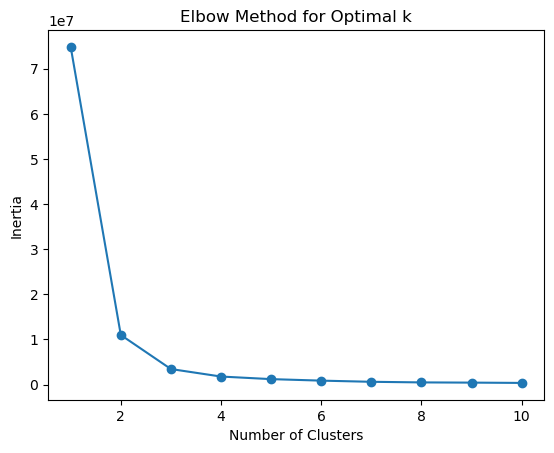

Enter the optimal number of clusters:  3


In [39]:
### inertia = []
possible_num_clusters = range(1, 11)
for k in possible_num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(combined_false_predictions)
    inertia.append(kmeans.inertia_)

#elbow curve
plt.plot(possible_num_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

optimal_num_clusters = int(input("Enter the optimal number of clusters: "))  # Input the optimal number

kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)

kmeans.fit(combined_false_predictions)

cluster_labels = kmeans.labels_

combined_false_predictions['cluster'] = cluster_labels


In [40]:
combined_false_predictions

cluster_0 = combined_false_predictions[combined_false_predictions['cluster'] == 0]

In [41]:
cluster_1 = combined_false_predictions[combined_false_predictions['cluster'] == 1]
cluster_2 = combined_false_predictions[combined_false_predictions['cluster'] == 2]

In [42]:
cluster_0

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,cluster
2,-1.851459,-1.638603,1.613273,2.109526,1,-0.449995,-0.707135,-0.822789,-0.76752,-0.836237,-0.351579,-1.028285,0.0,-0.805730,-0.828736,-1.086927,-0.205974,-0.812723,-1.023237,1.375433,1.720439,-0.117737,-0.651101,-0.580120,-0.027739,-0.706185,-0.197844,-0.625785,-0.582005,-0.059426,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,1.0,-0.814768,-0.696225,1.722200,-0.136282,0.0,-1.073393,-0.86971,-0.987999,-0.872354,1.0,0.0,0.0,-0.775591,-0.795312,0.0,-0.833531,-0.805730,-0.812723,-0.707831,-0.114299,1,-0.693412,-0.699734,-0.743678,-0.676033,-0.766505,20,-1.321508,-0.002037,-1.321508,-1.321486,0
3,-1.851460,-1.638603,1.613273,2.226898,1,-1.012432,-0.707137,-0.822789,-0.76752,-0.836237,-0.351579,-1.028285,0.0,-0.805730,-0.828736,-1.086927,-0.205974,-0.812723,-1.023237,1.558827,1.958621,-0.117770,-0.651101,-0.580122,-0.027774,-0.706187,-0.197877,-0.625785,-0.582008,-0.059460,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,1.0,-0.814768,-0.696225,1.960196,-0.136282,0.0,-1.073393,-0.86971,-0.987999,-0.872354,1.0,0.0,0.0,-0.775591,-0.795312,0.0,-0.833531,-0.805730,-0.812723,-0.707831,-0.114299,1,-0.693412,-0.699734,-0.748311,-0.676033,-0.766505,20,-1.321508,-0.002037,-1.321508,-1.321486,0
6,-1.809434,-1.638603,1.613273,1.340766,1,-0.439012,-0.705244,-0.836840,-0.75490,-0.838297,-0.351579,-1.072138,0.0,-0.901509,-0.926971,-1.086927,-0.205974,-0.812723,-1.023237,-0.336247,-0.486182,-0.072066,-0.651101,-0.576910,0.020421,-0.706199,-0.198178,-0.625785,-0.582029,-0.059778,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,0.0,-0.828484,-0.678357,-0.490899,0.223877,0.0,-1.116964,-1.00076,-1.065123,-0.874791,0.0,0.0,0.0,-0.788689,-0.795312,1.0,-1.029483,-0.901509,-0.812723,-0.707831,-0.114299,0,-0.857536,-0.699734,-0.781902,-0.280528,-0.766505,20,-1.321508,-0.002037,-1.321508,-1.321486,0
7,0.537469,0.224453,-0.583900,-0.543891,1,-0.398082,-0.706695,-0.822789,-0.75490,-0.838297,-0.351579,-1.072138,0.0,-0.901509,-0.926971,-1.086927,-0.205974,-0.812723,-1.023237,-0.336247,-0.399274,-0.112595,-0.647522,-0.579610,-0.024544,-0.706060,-0.194866,-0.625785,-0.581793,-0.056285,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,0.0,-0.814768,-0.685057,-0.430273,1.375267,0.0,-1.116964,-1.00076,-1.065123,-0.874791,1.0,0.0,0.0,-0.788689,-0.788603,0.0,-1.029483,-0.901509,-0.812723,-0.707831,-0.114299,0,-0.857536,-0.699734,-0.731998,-0.639206,-0.766505,20,-1.321508,-0.002037,-1.321508,-1.321486,0
8,-1.856330,-1.638603,1.613273,1.678858,1,-0.657219,-0.707140,-0.822789,-0.76752,-0.836237,-0.351579,-1.028285,0.0,-0.805730,-0.828736,-1.086927,-0.205974,-0.812723,-1.023237,2.190518,2.779026,-0.117847,-0.651101,-0.580127,-0.027855,-0.706190,-0.197952,-0.625785,-0.582013,-0.059539,-0.695045,-0.784328,-0.638338,-0.5766,-0.024873,1.0,-0.814768,-0.696225,2.779961,-0.136282,0.0,-1.073393,-0.86971,-0.987999,-0.872354,1.0,0.0,0.0,-0.775591,-0.795312,0.0,-0.833531,-0.805730,-0.812723,-0.707831,-0.114299,1,-0.693412,-0.699734,-0.743678,-0.676033,-0.766505,20,-1.321508,-0.002037,-1.321508,-1.321486,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

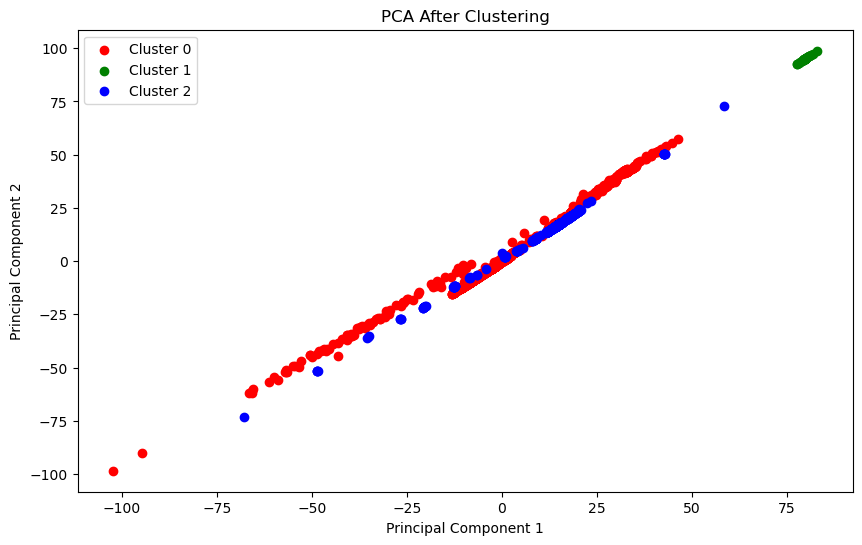

In [43]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(combined_false_predictions)

pca = PCA(svd_solver='randomized')
pca_result = pca.fit_transform(standardized_data)


num_components = 2
selected_components = pca_result[:, :num_components]

projected_data = np.dot(selected_components, selected_components.T)

# Added due to the crash
# projected_data = selected_components 

plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
for cluster_id in range(len(colors)):
    plt.scatter(
        projected_data[cluster_labels == cluster_id, 0],
        projected_data[cluster_labels == cluster_id, 1],
        color=colors[cluster_id],
        label=f'Cluster {cluster_id}'
    )

plt.title('PCA After Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

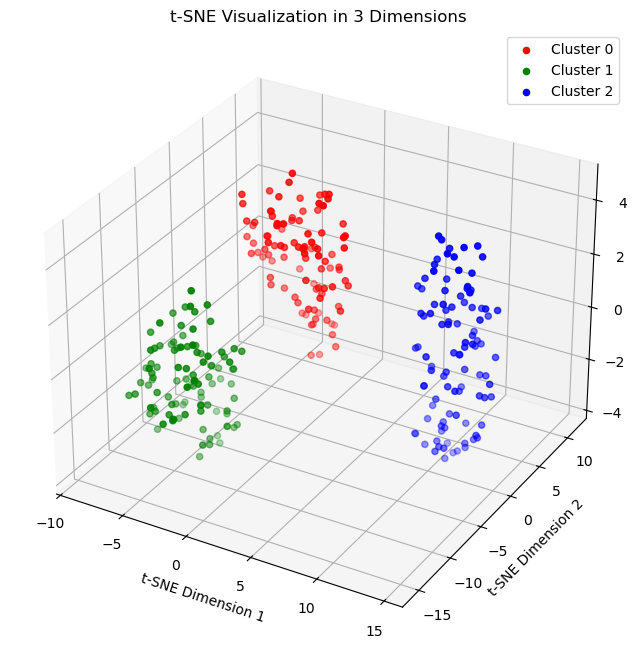

In [44]:
combined_false_predictions, labels = make_blobs(n_samples=300, n_features=10, centers=3, random_state=42)

scaler = StandardScaler()
standardized_data = scaler.fit_transform(combined_false_predictions)

tsne = TSNE(n_components=3, random_state=42)
tsne_result = tsne.fit_transform(standardized_data)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']
for cluster_id in range(len(colors)):
    ax.scatter(
        tsne_result[labels == cluster_id, 0],
        tsne_result[labels == cluster_id, 1],
        tsne_result[labels == cluster_id, 2],
        color=colors[cluster_id],
        label=f'Cluster {cluster_id}'
    )

ax.set_title('t-SNE Visualization in 3 Dimensions')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
ax.legend()
plt.show()

In [47]:
from scipy.spatial.distance import euclidean
from itertools import combinations

In [48]:
# Find centroids of each cluster
centroids = []
for cluster_id in range(3):
    cluster_points = projected_data[cluster_labels == cluster_id]
    centroid = cluster_points.mean(axis=0)
    centroids.append(centroid)

# Calculate pairwise distances between centroids
distances = {}
for (i, j) in combinations(range(3), 2):
    dist = euclidean(centroids[i], centroids[j])
    distances[f"Cluster {i} vs Cluster {j}"] = dist

# Print distances
print("Pairwise distances between clusters:")
for pair, dist in distances.items():
    print(f"{pair}: {dist:.4f}")

# Optional: Find the most different cluster
# By summing distances from each cluster to others
cluster_diffs = {i: 0 for i in range(3)}
for (i, j), dist in zip(combinations(range(3), 2), distances.values()):
    cluster_diffs[i] += dist
    cluster_diffs[j] += dist

# Find the cluster with the largest total distance to others
most_different_cluster = max(cluster_diffs, key=cluster_diffs.get)
print(f"\nCluster {most_different_cluster} is the most different (sum distance = {cluster_diffs[most_different_cluster]:.4f})")



Pairwise distances between clusters:
Cluster 0 vs Cluster 1: 10418.1954
Cluster 0 vs Cluster 2: 1686.1434
Cluster 1 vs Cluster 2: 8944.9983

Cluster 1 is the most different (sum distance = 19363.1937)


In [51]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(standardized_data)

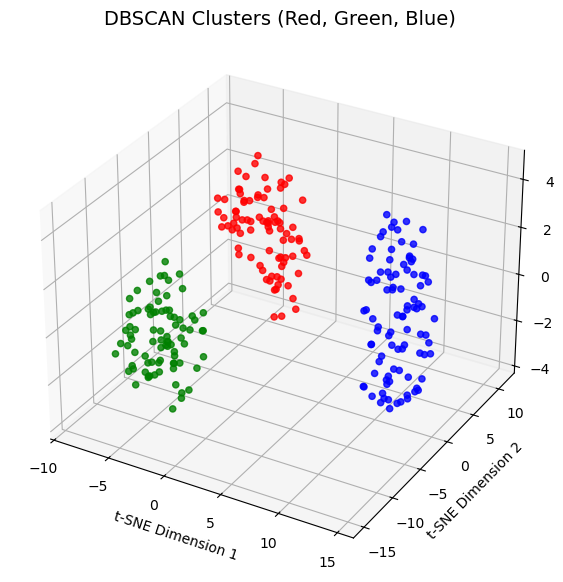

In [58]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import DBSCAN


# Run DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(standardized_data)

# Reduce to 3D using t-SNE
tsne_3d = TSNE(n_components=3, random_state=42)
tsne_result_3d = tsne_3d.fit_transform(standardized_data)

# Filter out noise
non_noise_mask = labels != -1
filtered_tsne = tsne_result_3d[non_noise_mask]
filtered_labels = labels[non_noise_mask]

# Assign red, green, blue to clusters 0, 1, 2
label_color_map = {
    0: 'red',
    1: 'green',
    2: 'blue'
}

colors = [label_color_map.get(label, 'black') for label in filtered_labels]

# Plot 3D scatter
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(filtered_tsne[:, 0], filtered_tsne[:, 1], filtered_tsne[:, 2],
           c=colors, s=20, alpha=0.8)

ax.set_title('DBSCAN Clusters (Red, Green, Blue)', fontsize=14)
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.show()

